In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [28]:
parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
df =  pd.read_csv(parent_directory + '/data/data_hourly.csv')

In [29]:
df.head()

,ID,From,Date,Hour,Participation_Phase,Demand_kWh,Price_signal,Experiment_price_NOK_kWh,Temperature,Temperature24,Temperature48,Temperature72
0,Exp_43,2020-02-01T00:00:00Z,2020-02-01,1,Phase_1,0.348,NaN,NaN,7.6,6.1,5.0,4.4
1,Exp_43,2020-02-01T01:00:00Z,2020-02-01,2,Phase_1,0.589,NaN,NaN,8.2,6.2,5.1,4.4
2,Exp_43,2020-02-01T02:00:00Z,2020-02-01,3,Phase_1,0.358,NaN,NaN,8.4,6.3,5.3,4.5
3,Exp_43,2020-02-01T03:00:00Z,2020-02-01,4,Phase_1,0.582,NaN,NaN,8.4,6.4,5.4,4.5
4,Exp_43,2020-02-01T04:00:00Z,2020-02-01,5,Phase_1,0.364,NaN,NaN,8.2,6.5,5.5,4.6


In [30]:
df.describe()
len(df)

13515600

In [31]:
unique_values_ID = df['ID'].nunique()

print("Count of unique values in the ID:", unique_values_ID)

Count of unique values in the ID: 4429


In [32]:
unique_values_Date = df['Date'].nunique()

print("Count of unique values in the Data:", unique_values_Date)

Count of unique values in the Data: 191


In [33]:
unique_values_Phase = df['Participation_Phase'].nunique()

print("Count of unique values in the Phase:", unique_values_Phase)

Count of unique values in the Phase: 2


In [34]:
unique_values_Hour = df['Hour'].nunique()

print("Count of unique values in the Hour:", unique_values_Hour)

Count of unique values in the Hour: 24


In [35]:
count_Phase1 = df['Participation_Phase'].value_counts()['Phase_1']

print("Total count of value phase_1:", count_Phase1)

Total count of value phase_1: 1335600


In [36]:
count_Phase2 = df['Participation_Phase'].value_counts()['Phase_2']

print("Total count of value phase_2:", count_Phase2)


Total count of value phase_2: 12180000


In [37]:
grouped_data_p1 = df[df['Participation_Phase'] == 'Phase_1'].groupby('ID').size()

print("Count of unique values for ID for Phase_1 ", grouped_data_p1)

Count of unique values for ID for Phase_1  ID
Exp_1      1800
Exp_10     1800
Exp_100    1800
Exp_101    1800
Exp_102    1800
           ... 
Exp_95     1800
Exp_96     1800
Exp_97     1800
Exp_98     1800
Exp_99     1800
Length: 742, dtype: int64


In [38]:
grouped_data_p2 = df[df['Participation_Phase'] == 'Phase_2'].groupby('ID').size()

print("Count of unique values for ID for Phase_2 ", grouped_data_p2)

Count of unique values for ID for Phase_2  ID
Exp_1      2784
Exp_10     2784
Exp_100    2784
Exp_101    2784
Exp_102    2784
           ... 
Exp_95     2784
Exp_96     2784
Exp_97     2784
Exp_98     2784
Exp_99     2784
Length: 4375, dtype: int64


In [39]:
grouped_data_Date = df[df['ID'] == 'Exp_43'].groupby('Date').size()

print("Count of unique values for Date for Specific ID ", grouped_data_Date)

Count of unique values for Date for Specific ID  Date
2020-01-06    24
2020-01-07    24
2020-01-08    24
2020-01-09    24
2020-01-10    24
              ..
2021-03-22    24
2021-03-23    24
2021-03-24    24
2021-03-25    24
2021-03-26    24
Length: 191, dtype: int64


In [40]:
# Filter the dataset for Participation Phase 1 and 2 separately
phase1_data = df[df['Participation_Phase'] == 'Phase_1']
phase2_data = df[df['Participation_Phase'] == 'Phase_2']

# Extract unique IDs for each phase
phase1_ids = set(phase1_data['ID'])
phase2_ids = set(phase2_data['ID'])

# Find the intersection of the sets of IDs
common_ids = phase1_ids.intersection(phase2_ids)

# Calculate the number of common IDs
num_common_ids = len(common_ids)

print("Number of common IDs between Participation Phase 1 and 2:", num_common_ids)

Number of common IDs between Participation Phase 1 and 2: 688


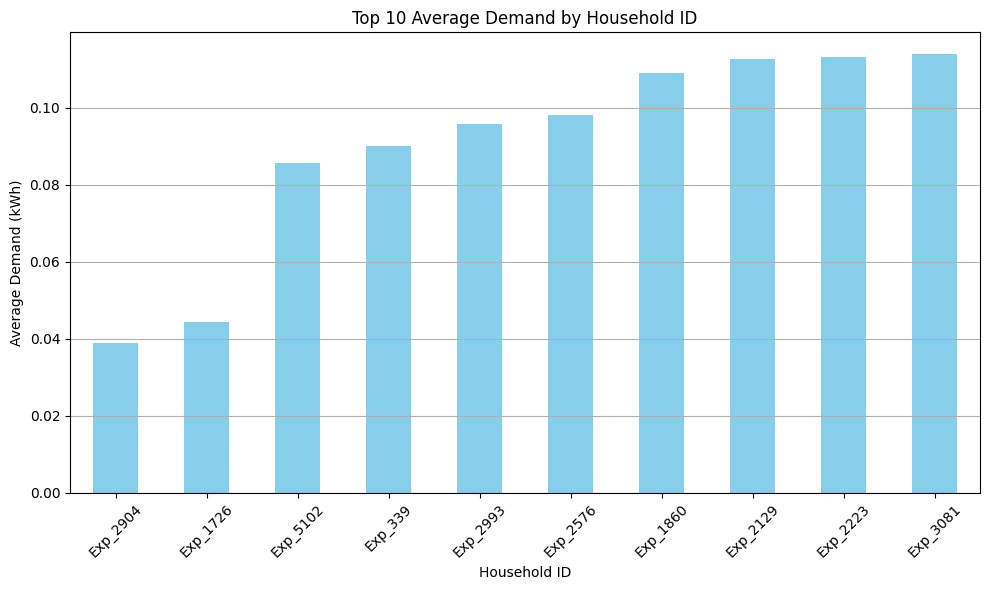

In [42]:
# Group the dataset by household_id and calculate the average demand
average_demand = df.groupby('ID')['Demand_kWh'].mean()

# Sort the average demands in descending order and take the top 10 records
top_10_average_demand = average_demand.nlargest(10)
# Plot the graph
plt.figure(figsize=(10, 6))
top_10_average_demand.plot(kind='bar', color='skyblue')
plt.title('Top 10 Average Demand by Household ID')
plt.xlabel('Household ID')
plt.ylabel('Average Demand (kWh)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines to y-axis
plt.tight_layout()
plt.show()

In [16]:
phase1_data = df[df['Participation_Phase'] == 'Phase_1']
phase2_data = df[df['Participation_Phase'] == 'Phase_2']

# Get unique IDs for each phase
phase1_ids = set(phase1_data['ID'])
phase2_ids = set(phase2_data['ID'])

# Get IDs that are in Phase 1 but not in Phase 2
ids_only_in_phase1 = phase1_ids - phase2_ids

# Convert the set to a list if needed
ids_only_in_phase1_list = list(ids_only_in_phase1)

print("List of IDs only in Phase 1 and not in Phase 2:", ids_only_in_phase1_list)

List of IDs only in Phase 1 and not in Phase 2: ['Exp_693', 'Exp_272', 'Exp_17', 'Exp_446', 'Exp_208', 'Exp_553', 'Exp_325', 'Exp_223', 'Exp_420', 'Exp_266', 'Exp_222', 'Exp_587', 'Exp_332', 'Exp_367', 'Exp_451', 'Exp_462', 'Exp_86', 'Exp_191', 'Exp_103', 'Exp_313', 'Exp_612', 'Exp_509', 'Exp_12', 'Exp_502', 'Exp_401', 'Exp_567', 'Exp_56', 'Exp_737', 'Exp_182', 'Exp_49', 'Exp_649', 'Exp_547', 'Exp_643', 'Exp_733', 'Exp_315', 'Exp_128', 'Exp_62', 'Exp_365', 'Exp_271', 'Exp_111', 'Exp_690', 'Exp_460', 'Exp_445', 'Exp_93', 'Exp_529', 'Exp_124', 'Exp_518', 'Exp_635', 'Exp_52', 'Exp_23', 'Exp_732', 'Exp_500', 'Exp_570', 'Exp_356']


In [17]:
grouped_data_Date = df[df['ID'] == 'Exp_103'].groupby('Date').size()

print("Count of unique values for Date for Specific ID ", grouped_data_Date)

Count of unique values for Date for Specific ID  Date
2020-01-06    24
2020-01-07    24
2020-01-08    24
2020-01-09    24
2020-01-10    24
              ..
2020-03-16    24
2020-03-17    24
2020-03-18    24
2020-03-19    24
2020-03-20    24
Length: 75, dtype: int64


In [18]:
grouped_data_Date = df[df['ID'] == 'Exp_445'].groupby('Date').size()

print("Count of unique values for Date for Specific ID ", grouped_data_Date)

Count of unique values for Date for Specific ID  Date
2020-01-06    24
2020-01-07    24
2020-01-08    24
2020-01-09    24
2020-01-10    24
              ..
2020-03-16    24
2020-03-17    24
2020-03-18    24
2020-03-19    24
2020-03-20    24
Length: 75, dtype: int64


In [19]:
# Get IDs that are in Phase 1 but not in Phase 2
ids_only_in_phase2 = phase2_ids - phase1_ids

# Convert the set to a list if needed
ids_only_in_phase2_list = list(ids_only_in_phase2)

print("List of IDs only in Phase 2 :", ids_only_in_phase2_list)

List of IDs only in Phase 2 : ['Exp_3734', 'Exp_2798', 'Exp_4533', 'Exp_5162', 'Exp_3441', 'Exp_4921', 'Exp_3539', 'Exp_5033', 'Exp_3870', 'Exp_4578', 'Exp_3168', 'Exp_4671', 'Exp_4177', 'Exp_1851', 'Exp_4429', 'Exp_2002', 'Exp_2100', 'Exp_2066', 'Exp_3229', 'Exp_5277', 'Exp_3715', 'Exp_3933', 'Exp_4449', 'Exp_2687', 'Exp_3871', 'Exp_5303', 'Exp_4985', 'Exp_4785', 'Exp_2197', 'Exp_2021', 'Exp_2317', 'Exp_3105', 'Exp_3607', 'Exp_3444', 'Exp_2975', 'Exp_4385', 'Exp_3973', 'Exp_4816', 'Exp_5058', 'Exp_3660', 'Exp_4499', 'Exp_2794', 'Exp_5081', 'Exp_5211', 'Exp_2908', 'Exp_1844', 'Exp_1923', 'Exp_2223', 'Exp_5107', 'Exp_2692', 'Exp_2408', 'Exp_2335', 'Exp_3080', 'Exp_3319', 'Exp_2141', 'Exp_4266', 'Exp_2712', 'Exp_5249', 'Exp_1893', 'Exp_2525', 'Exp_5097', 'Exp_2558', 'Exp_4237', 'Exp_2813', 'Exp_2363', 'Exp_5283', 'Exp_3860', 'Exp_3309', 'Exp_2089', 'Exp_2934', 'Exp_3173', 'Exp_3627', 'Exp_3594', 'Exp_2930', 'Exp_2294', 'Exp_4596', 'Exp_5339', 'Exp_2998', 'Exp_2797', 'Exp_5024', 'Exp_3033

In [20]:
grouped_data_Date = df[df['ID'] == 'Exp_4640'].groupby('Date').size()

print("Count of unique values for Date for Specific ID ", grouped_data_Date)

Count of unique values for Date for Specific ID  Date
2020-12-01    24
2020-12-02    24
2020-12-03    24
2020-12-04    24
2020-12-05    24
              ..
2021-03-22    24
2021-03-23    24
2021-03-24    24
2021-03-25    24
2021-03-26    24
Length: 116, dtype: int64


In [21]:
# Find the intersection of the sets of household IDs
common_household_ids = phase1_ids.intersection(phase2_ids)

# Calculate the number of common household IDs
num_common_household_ids = len(common_household_ids)

print("Number of household IDs present in both Phase 1 and Phase 2:", num_common_household_ids)


Number of household IDs present in both Phase 1 and Phase 2: 688


In [22]:
#drop unnecessary columns
df.drop(columns=["Experiment_price_NOK_kWh", "Price_signal"], inplace=True)

#Correct dataframe date time column
df['Date'] = pd.to_datetime(df['Date'])
df['From'] = pd.to_datetime(df["From"])

df.head()

,ID,From,Date,Hour,Participation_Phase,Demand_kWh,Temperature,Temperature24,Temperature48,Temperature72
0,Exp_43,2020-02-01 00:00:00+00:00,2020-02-01,1,Phase_1,0.348,7.6,6.1,5.0,4.4
1,Exp_43,2020-02-01 01:00:00+00:00,2020-02-01,2,Phase_1,0.589,8.2,6.2,5.1,4.4
2,Exp_43,2020-02-01 02:00:00+00:00,2020-02-01,3,Phase_1,0.358,8.4,6.3,5.3,4.5
3,Exp_43,2020-02-01 03:00:00+00:00,2020-02-01,4,Phase_1,0.582,8.4,6.4,5.4,4.5
4,Exp_43,2020-02-01 04:00:00+00:00,2020-02-01,5,Phase_1,0.364,8.2,6.5,5.5,4.6


In [25]:
#Seperate data frame into two based on phases
phase_1_df = df[df["Participation_Phase"]=="Phase_1"]
phase_2_df = df[df["Participation_Phase"]=="Phase_2"]

phase_1_df = phase_1_df[phase_1_df['ID'].isin(ids_only_in_phase1_list)]
phase_2_df = phase_2_df[phase_2_df['ID'].isin(ids_only_in_phase2_list)]

grouped_data = df[df['ID'].isin(common_household_ids)]
grouped_data = grouped_data.groupby("ID")
common_records= pd.concat([group for _, group in grouped_data])

phase_1_df.to_csv(parent_directory + "/data/phase_1_data.csv",index=False)
phase_2_df.to_csv(parent_directory + "/data/phase_2_data.csv",index=False)
common_records.to_csv(parent_directory + "/data/common_records.csv",index=False)

In [26]:
print(len(phase_1_df["ID"].unique()))
print(len(phase_2_df["ID"].unique()))
print(len(common_records["ID"].unique()))

54
3687
688
